In [17]:
import pandas as pd  

# Wczytanie pliku
df = pd.read_csv("seattle-weather.csv")

# Podgląd pierwszych wierszy
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [19]:
# Sprawdzenie brakujących wartości
print(df.isnull().sum())

# Sprawdzenie typów danych
print(df.dtypes)

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64
date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object


In [21]:
df = df.dropna()  # Usunięcie brakujących wartości

In [23]:
# Konwersja daty
df["date"] = pd.to_datetime(df["date"])

# Dodanie cech czasowych
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["year"] = df["date"].dt.year

# Mapowanie pór roku (0 = zima, 1 = wiosna, 2 = lato, 3 = jesień)
df["season"] = df["month"].apply(lambda x: 0 if x in [12,1,2] else 1 if x in [3,4,5] else 2 if x in [6,7,8] else 3)

In [25]:
# Wybór cech wejściowych (X) i celu (y)
X = df[["precipitation", "wind", "month", "day", "season"]]
y = df["temp_max"]  # Przewidujemy maksymalną temperaturę


In [27]:
from sklearn.model_selection import train_test_split

# Podział danych (80% trening, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tworzymy model
model = LinearRegression()

# Trenowanie modelu
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# Obliczenie błędów
mae = mean_absolute_error(y_test, y_pred)  # Średni błąd absolutny
mse = mean_squared_error(y_test, y_pred)   # Średni błąd kwadratowy

print(f"Mean Absolute Error: {mae:.2f}°C")
print(f"Mean Squared Error: {mse:.2f}")

Mean Absolute Error: 5.10°C
Mean Squared Error: 38.80


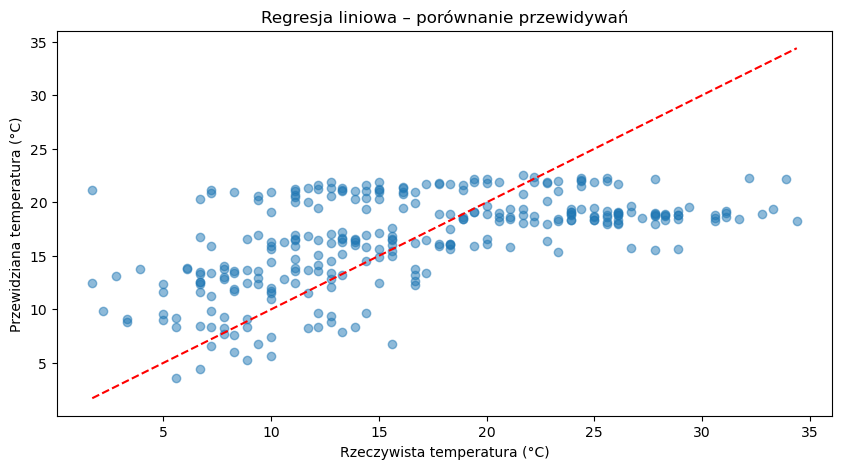

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linestyle="--")  # Idealna linia
plt.xlabel("Rzeczywista temperatura (°C)")
plt.ylabel("Przewidziana temperatura (°C)")
plt.title("Regresja liniowa – porównanie przewidywań")
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Poprawiona definicja modelu
model_nn = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Definiujemy wejście
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)  # Warstwa wyjściowa do regresji
])

# Kompilacja modelu
model_nn.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Wyświetlenie architektury sieci
model_nn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,137 (43.50 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Trenowanie modelu
history = model_nn.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_data=(X_test_scaled, y_test))

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 270.5594 - mae: 14.3089 - val_loss: 61.7253 - val_mae: 6.5381
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55.2811 - mae: 6.0742 - val_loss: 47.4146 - val_mae: 5.5854
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47.8015 - mae: 5.5649 - val_loss: 34.9095 - val_mae: 4.7366
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34.4322 - mae: 4.7201 - val_loss: 25.3943 - val_mae: 4.0385
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.9974 - mae: 4.0130 - val_loss: 21.8785 - val_mae: 3.7507
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.2003 - mae: 3.5051 - val_loss: 17.6866 - val_mae: 3.3555
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.9813 - mae: 3.3693 - val_loss: 15.6962 - val_mae: 3.1014
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.6884 - mae: 3.1311 - val_loss: 14.1892 - val_mae: 2.9120
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

In [43]:
# Ocena na zbiorze testowym
test_loss, test_mae = model_nn.evaluate(X_test_scaled, y_test)

print(f"Mean Absolute Error (sieć neuronowa): {test_mae:.2f}°C")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.0820 - mae: 2.8398 
Mean Absolute Error (sieć neuronowa): 2.80°C


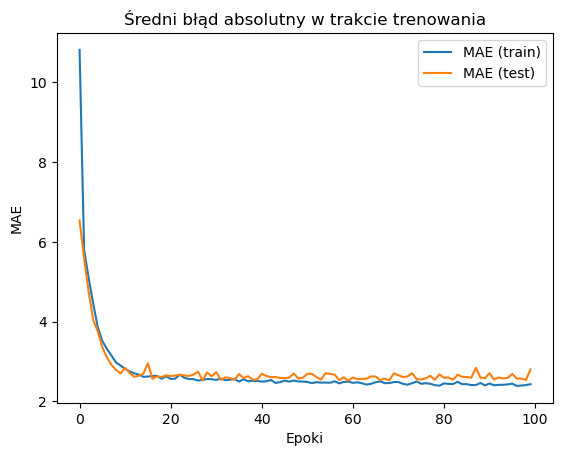

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history["mae"], label="MAE (train)")
plt.plot(history.history["val_mae"], label="MAE (test)")
plt.xlabel("Epoki")
plt.ylabel("MAE")
plt.legend()
plt.title("Średni błąd absolutny w trakcie trenowania")
plt.show()